## TSI TDMA output file configuration

**lines 1-18 : DMA standard configuration and experimental settings**

This is general DMA information, including model info
- 0	Sample File	P:\aerosols\private\Bret Hatzinger\Summer Work 2021\Internal Mixtures\0.1gL AmmSulf_Sucrose Internal Mix (6_7_21)\0.1gL AmmSulf_Sucrose Internal Mix (6_7_21).S80
- 1	Classifier Model	3080
- 2	DMA Model	3081
- 3	**DMA Inner Radius(cm)**	0.00937
- 4	**DMA Outer Radius(cm)**	0.01961
- 5	**DMA Characteristic Length(cm)**	0.44369
- 6	CPC Model	3776 Low Flow
- 7	**Reference Gas Viscosity (Pa*s)**	1.83E-05
- 8	**Reference Mean Free Path (m)**	6.73E-08
- 9	**Reference Gas Temperature (K)**	296.15
- 10	**Reference Gas Pressure (kPa)**	101.3
- 11	Channels/Decade	64
- 12	Multiple Charge Correction	TRUE
- 13	Nanoparticle Aggregate Mobility Analysis	FALSE
- 14	Diffusion Correction	TRUE
- 15	**Gas Density**	0.0012
- 16	Units	dw/dlogDp
- 17	Weight	Number

**lines 19-126 : Actual data collected for multiple scans**
- each row represents a dp midpoint value for the scan
- the value represents the cpc counts for that bin

Here are what the first several rows look like. The first three rows are the sample number and the time stamp for the scan. The fourth row is just a label for the remaining first column

- 18	Sample #	1
- 19	Date	6/7/21
- 20	Start Time	14:16:57
- 21	Diameter Midpoint
- 22	8.2	1.39E+06
- 23	8.51	931386
- 24	8.82	418658
- 25	9.14	582892

**lines 127-151 : More experiment settings**

The following are settings for the scanning DMA.

- 126	**Scan Up Time(s)**	120
- 127	**Retrace Time(s)**	15
- 128	Down Scan First	FALSE
- 129	Scans Per Sample	1
- 130	Impactor Type(cm)	0.071
- 131	**Sheath Flow(lpm)**	7.99998
- 132	**Aerosol Flow(lpm)**	0.3
- 133	**CPC Inlet Flow(lpm)**	0.3
- 134	CPC Sample Flow(lpm)	0.05
- 135	**Low Voltage**	10.0272
- 136	**High Voltage**	9530.41
- 137	**Lower Size(nm)**	8.05842
- 138	**Upper Size(nm)**	339.821
- 139	Density(g/cc)	1
- 140	Title
- 141	**Status Flag**	Normal Scan
- 142	td(s)	4.3
- 143	tf(s)	2.99021
- 144	D50(nm)	1415.69
- 145	Median(nm)	33.4426
- 146	Mean(nm)	39.529
- 147	Geo. Mean(nm)	32.317
- 148	Mode(nm)	35.8664
- 149	Geo. Std. Dev.	1.90518
- 150	Total Concentration(#/cm≥)	1.86E+06

In [10]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import sys
import os

In [11]:
# Add the path where all python *packages* are located
sys.path.insert(1, '../model')

import model.setup
import model.dma1
import model.samples
import model.sample

In [12]:
#os.chdir("/Users/brk009/PycharmProjects/ChemicsCurveFit")
print(os.getcwd())


C:\Users\brk009\Documents\PycharmProjects\HTDMA\notebooks


In [14]:
#filename = "../data/0.1gL AmmSulf_Sucrose Internal Mix (6_7_21).txt"
filename = "../data/A-Pinene Carene 100.100.200ppb (7.14.txt"
#filename = "../data/HTDMA 0.1gL AmmSulf200nmPSL Sample Peaks.txt"
#setup = model.Setup(filename)

setup = model.setup.Setup(filename)
print(setup)

DMA 1
  r_in_cm: 0.937
  r_out_cm: 1.961
  length_cm: 44.369
Parameters:
  gas viscosity: 1.83245e-05
  gas density: 0.0012
  mean free path: 6.73e-08
  temp (K): 296.15
  pres (kPa): 101.3



In [15]:
samples = model.samples.Samples(filename)
print(samples)

Index: Index(['Date', '8.20', '8.51', '8.82', '9.14', '9.47', '9.82', ' 10.2',
       ' 10.6', ' 10.9',
       ...
       'td(s)', 'tf(s)', 'D50(nm)', 'Median(nm)', 'Mean(nm)', 'Geo. Mean(nm)',
       'Mode(nm)', 'Geo. Std. Dev.', 'Total Concentration(#/cm�)', 'Comment'],
      dtype='object', name='Sample #', length=131)
Columns: Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
       '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79'],
      dtype='object')
Num Rows: 131
Num Cols: 79
Num dp values: 104



---
# DMA 1

In [16]:
# to create a dma 1 object, you need to instantiate it from both
# a setup and samples object.
dma_1_theo = model.dma1.DMA_1(setup,samples,debug=False)

print(dma_1_theo)

q_sh = 8.0 lpm 133.33 cm3/sec
q_aIn = 0.3 lpm 0.30 cm3/sec
q_aOut = 0.3 lpm 0.30 cm3/sec
q_excess = 8.0 lpm 133.33 cm3/sec
gas viscosity = 0.0001832 Poise
mean free path = 67.300 nm
No voltage set
WILL USE:
dma1 length: 44.369 cm
dma1 radius In 0.937 cm
dma1 radius Out 1.961 cm



In [17]:
# Example of working with a DMA_1 object

dma_1_theo.set_voltage(10000)
print(dma_1_theo)

q_sh = 8.0 lpm 133.33 cm3/sec
q_aIn = 0.3 lpm 0.30 cm3/sec
q_aOut = 0.3 lpm 0.30 cm3/sec
q_excess = 8.0 lpm 133.33 cm3/sec
gas viscosity = 0.0001832 Poise
mean free path = 67.300 nm
Voltage = 10000.0 V
dp not computed
WILL USE:
dma1 length: 44.369 cm
dma1 radius In 0.937 cm
dma1 radius Out 1.961 cm



In [18]:

dma_1_theo.compute_theoretical_dist(verbose=True)
print(dma_1_theo)

print("dp = {:.1f}".format(dma_1_theo.dp_center))

Zp = 3.5321915819634534e-05, Zp_fwhh = 1.3245751546741815e-06
Cs (pass 1) = 1.3062498683743553
Dp (pass 1) = 343.0372321246223
Cs (pass 2) = 1.4873000314656097
Dp (pass 2) = 390.583224913757
Cs (pass 3) = 1.4220120529420885
Dp (pass 3) = 373.43780121959594
Cs (pass 4) = 1.4434432968697697
Dp (pass 4) = 379.065908655954
Cs (pass 5) = 1.4361722862439756
Dp (pass 5) = 377.1564521115294
Cs (pass 6) = 1.438612290785834
Dp (pass 6) = 377.79722722253655
Cs (pass 7) = 1.4377904392095218
Dp (pass 7) = 377.58139892139667
Dp (init value of Cs = 2) = 377.6540047217896
Cs (pass 1) = 1.3185079341860242
Dp (pass 1) = 333.74103057517345
Cs (pass 2) = 1.5024789124183733
Dp (pass 2) = 380.3078067615385
Cs (pass 3) = 1.4345998324711764
Dp (pass 3) = 363.12623848371277
Cs (pass 4) = 1.4574119309919087
Dp (pass 4) = 368.90044209105895
Cs (pass 5) = 1.4494836935209197
Dp (pass 5) = 366.89364480481737
Cs (pass 6) = 1.4522078945506371
Dp (pass 6) = 367.58319519399504
Cs (pass 7) = 1.4512681365866398
Dp (pass 

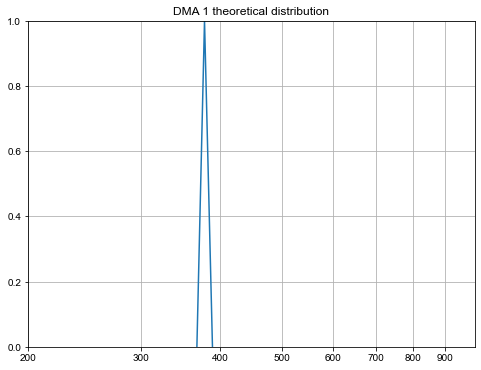

In [19]:
fig, ax = dma_1_theo.plot()
plt.show()

---
# DMA 2

## Working with one scan

In [25]:
# let's grab one sample from the file

# sample_num represents the sample in the dataframe of all samples we'll extract
sample_column = 30

sample = samples.get_sample(sample_column)

print(sample)

sample #: 31
dp range: array([  8.2 ,   8.51,   8.82,   9.14,   9.47,   9.82,  10.2 ,  10.6 ,
        10.9 ,  11.3 ,  11.8 ,  12.2 ,  12.6 ,  13.1 ,  13.6 ,  14.1 ,
        14.6 ,  15.1 ,  15.7 ,  16.3 ,  16.8 ,  17.5 ,  18.1 ,  18.8 ,
        19.5 ,  20.2 ,  20.9 ,  21.7 ,  22.5 ,  23.3 ,  24.1 ,  25.  ,
        25.9 ,  26.9 ,  27.9 ,  28.9 ,  30.  ,  31.1 ,  32.2 ,  33.4 ,
        34.6 ,  35.9 ,  37.2 ,  38.5 ,  40.  ,  41.4 ,  42.9 ,  44.5 ,
        46.1 ,  47.8 ,  49.6 ,  51.4 ,  53.3 ,  55.2 ,  57.3 ,  59.4 ,
        61.5 ,  63.8 ,  66.1 ,  68.5 ,  71.  ,  73.7 ,  76.4 ,  79.1 ,
        82.  ,  85.1 ,  88.2 ,  91.4 ,  94.7 ,  98.2 , 101.8 , 105.5 ,
       109.4 , 113.4 , 117.6 , 121.9 , 126.3 , 131.  , 135.8 , 140.7 ,
       145.9 , 151.2 , 156.8 , 162.5 , 168.5 , 174.7 , 181.1 , 187.7 ,
       194.6 , 201.7 , 209.1 , 216.7 , 224.7 , 232.9 , 241.4 , 250.3 ,
       259.5 , 269.  , 278.8 , 289.  , 299.6 , 310.6 , 322.  , 333.8 ])
values: array([1.71190e+05, 0.00000e+00, 1.04665e+05,

### Graphing a sample

You'll notice that the data is very skewed when you do not properly map to logspace



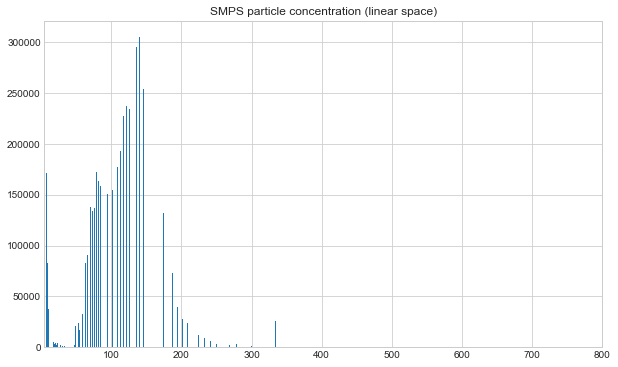

In [26]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.bar(x=sample.get_dp_range(),
       height=sample.get_values(),
       fill=True)
ax.set_xlim(5,800)

plt.title("SMPS particle concentration (linear space)")
plt.show()


Now, let's replot in log space

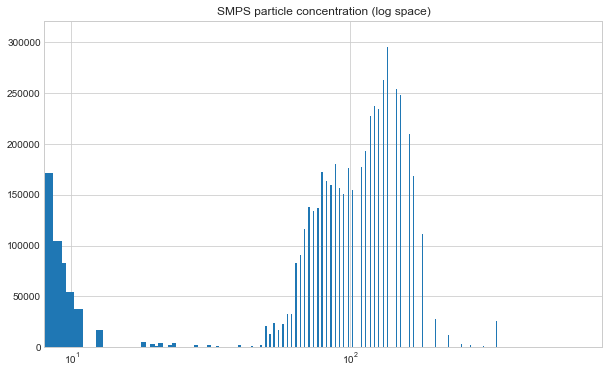

In [27]:
# Let's redo that, but plot in log space

fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_xscale('log')
ax.bar(x=sample.get_dp_range(),
       height=sample.get_values(),
       #width=1,
       fill=True)
ax.set_xlim(8,800)

plt.title("SMPS particle concentration (log space)")
plt.show()

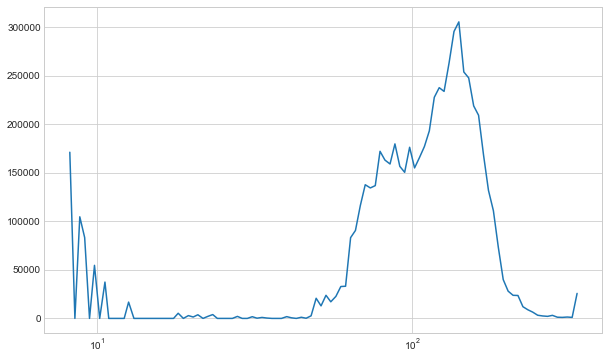

In [28]:
# Plot as a line
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.set_xscale('log')
ax.plot(sample.get_dp_range(),
        sample.get_values())
plt.show()

---
# Curve Fit

Let's recall the standard normal distribution as defined by the quintessential probability density function:
- https://en.wikipedia.org/wiki/Normal_distribution

- $f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$

I'm following lots of ideas online of basic gaussian curve fits

- http://www.emilygraceripka.com/blog/16


The scipy package has a decent curve fit function.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit


No handles with labels found to put in legend.


Starting fit
xdata.shape = (104,)
ydata.shape = (104,)
p0_init = [52243.17961607144, 3.9576882387846766, 0.18532039284787638]
min bounds = [10448.635923214288, 2.1041341542702074, 0.037064078569575276]
max bounds = [610906.0, 5.810542011227735, 0.7412815713915055]
p0_init = [52243.17961607144, 3.9576882387846766, 0.18532039284787638]
min bounds = [10448.635923214288, 2.1041341542702074, 0.037064078569575276]
max bounds = [610906.0, 5.810542011227735, 0.7412815713915055]
Pass 1 : parameters:
Peak: 1
amp: 82517.2
mu: 4.416
sd: 0.202
Peak: 2
amp: 127450.3
mu: 4.939
sd: 0.184
RMSE = 72369.881470075
Durbin-Watson = 1.9986701491599923


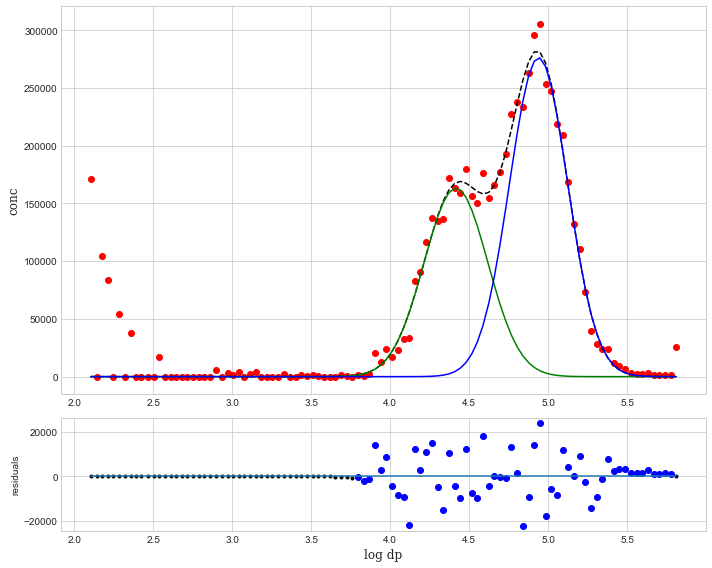

No handles with labels found to put in legend.


Pass 2 : parameters:
Peak: 1
amp: 81830.8
mu: 4.416
sd: 0.199
Peak: 2
amp: 127680.8
mu: 4.938
sd: 0.184
RMSE = 72470.17685681464
Durbin-Watson = 1.9941512874567335


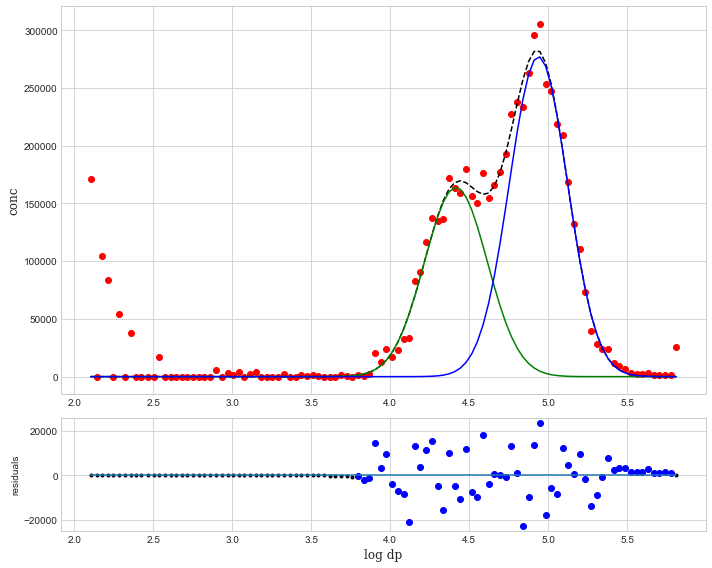

No handles with labels found to put in legend.


Pass 3 : parameters:
Peak: 1
amp: 106062.6
mu: 4.436
sd: 0.263
Peak: 2
amp: 113163.8
mu: 4.955
sd: 0.176
RMSE = 98803.70154337745
Durbin-Watson = 1.084978408888003


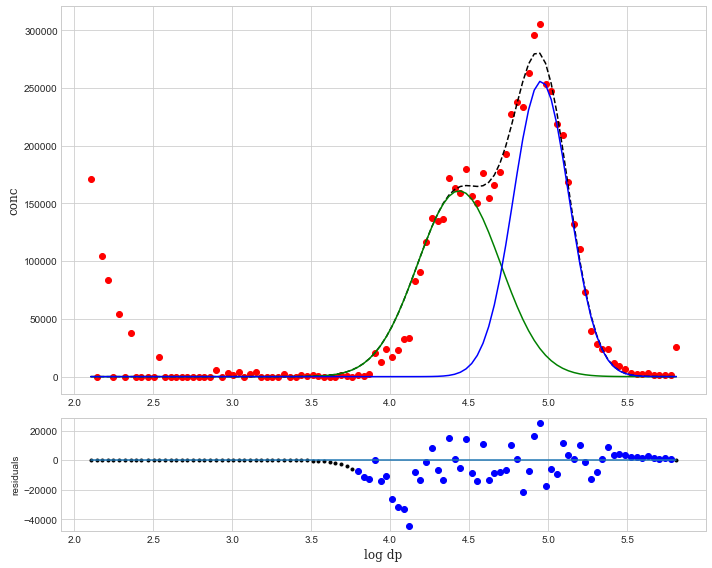

No handles with labels found to put in legend.


Pass 4 : parameters:
Peak: 1
amp: 140320.5
mu: 4.491
sd: 0.337
Peak: 2
amp: 71302.8
mu: 4.959
sd: 0.127
RMSE = 175972.49691245516
Durbin-Watson = 0.38789477586421706


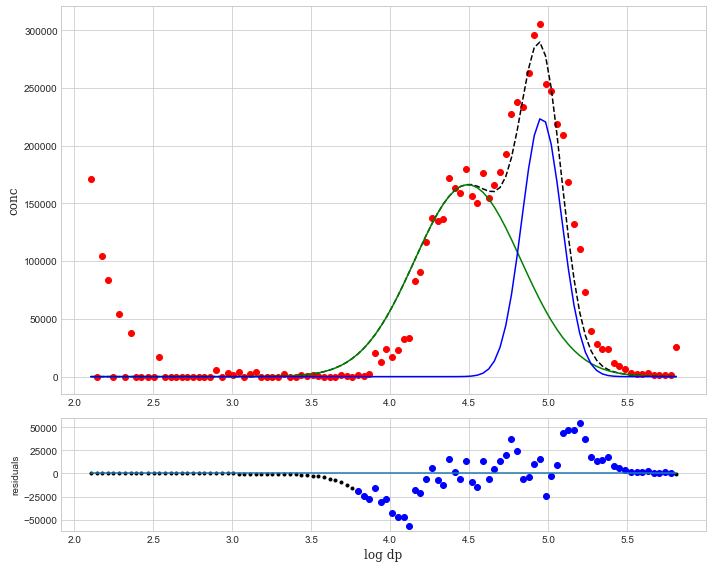

No handles with labels found to put in legend.


Pass 5 : parameters:
Peak: 1
amp: 75966.5
mu: 4.429
sd: 0.185
Peak: 2
amp: 122875.8
mu: 4.913
sd: 0.167
RMSE = 131855.82131973933
Durbin-Watson = 0.6573897476828442


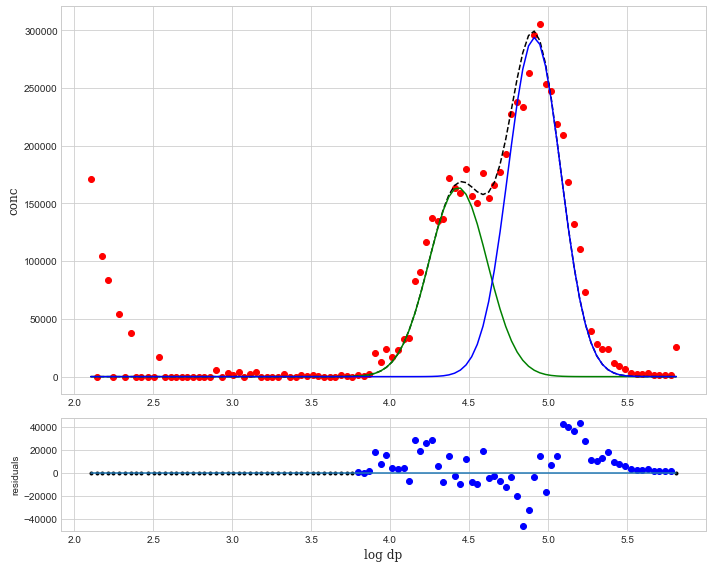

No handles with labels found to put in legend.


Pass 6 : parameters:
Peak: 1
amp: 321570.2
mu: 4.592
sd: 0.741
Peak: 2
amp: 30064.3
mu: 4.945
sd: 0.079
RMSE = 449402.2962626678
Durbin-Watson = 0.05870149710565634


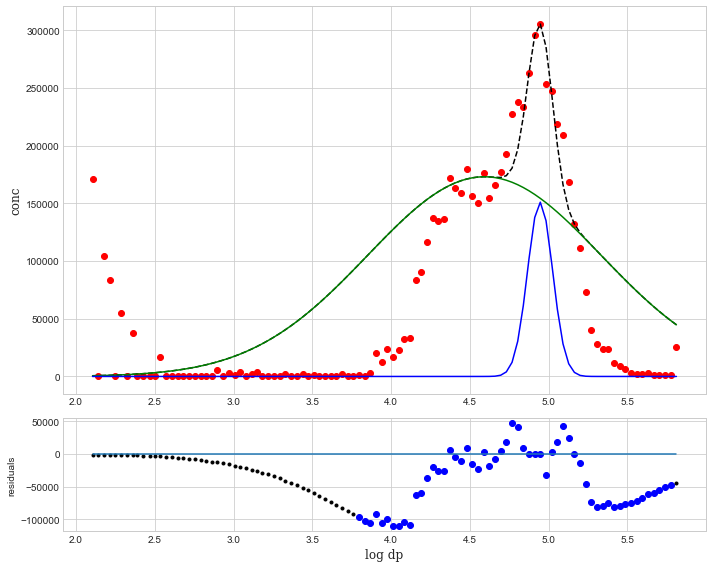

In [29]:
num_peaks = 2
sample.fit(num_peaks=num_peaks,verbose=True,plot_steps = True)

In [14]:
sample.get_fit_peak_dp()

2


array([ 98.66251747, 140.50706337])

No handles with labels found to put in legend.


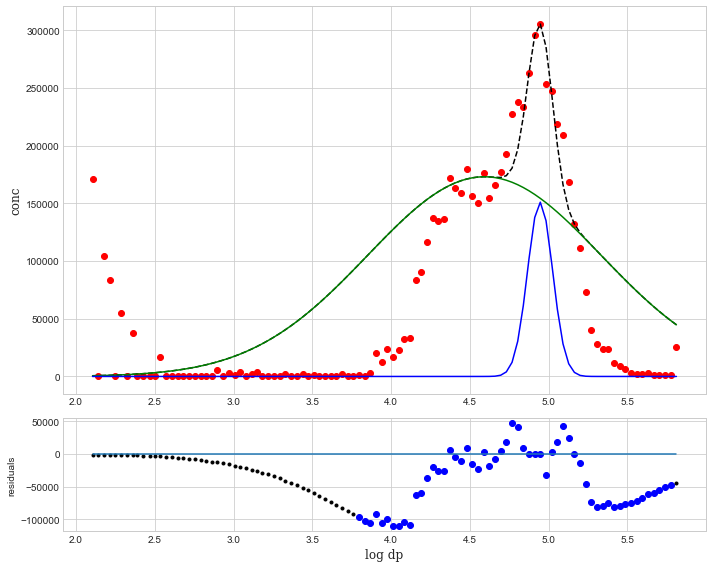

In [15]:
fig, ax = sample.plot_fit()
plt.show()

In [11]:
    # def _find_row_of_bottom_config_info(self,filename) -> int:
    #     """
    #     Helper function - find the row number after the samples
    #     :param filename:
    #     :return: the row number
    #     :raise: IOError - if the line could not be found
    #     """
    #
    #     f = open(filename, 'r')
    #     count = 0
    #     while True:
    #         line = f.readline()
    #         if not line:
    #             raise IOError("Run config info could not be found")
    #         line = line.strip()
    #
    #         # Look for the row "Scan Up Time(s)". Scan Up is sufficient
    #         if line.startswith("Scan Up"):
    #             bottom_config_rownum = count-1
    #             break
    #         count += 1
    #     f.close()
    #     return bottom_config_rownum

        # # Now, read the bottom config info
        # skip_rows = self._find_row_of_bottom_config_info(filename)
        # display("Skipping " + str(skip_rows))
        # df_dma_info = pd.read_csv(filename,
        #                  header=None,
        #                  sep='\t',
        #                  index_col=0,
        #                  nrows=skip_rows)
        # display(df_dma_info)
